In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, median_absolute_error,mean_absolute_error

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read dataset
"""def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df"""

In [5]:
# convert to date types
def convert(df):
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    return (df)

In [6]:
# make date feature
def date_feat(df, label=None):
    
    df['date'] = df.DATE
    df['month'] = df['DATE'].dt.strftime('%B')
    
    df['dayofweek'] = df['DATE'].dt.strftime('%A')
    df['quarter'] = df['DATE'].dt.quarter
    df['dayofyear'] = df['DATE'].dt.dayofyear
    df['dayofmonth'] = df['DATE'].dt.day
    df['weekofyear'] = df['DATE'].dt.weekofyear
    
    return (df)

In [7]:
data = pd.read_csv('C:/Users/azade/Desktop/WCS/file.csv')
data.head(10)

,DATE,ITEM,SALES
0,02-01-2019,A,113
1,03-01-2019,A,143
2,04-01-2019,A,145
3,05-01-2019,A,167
4,06-01-2019,A,202
5,09-01-2019,A,146
6,10-01-2019,A,202
7,11-01-2019,A,144
8,12-01-2019,A,116
9,13-01-2019,A,114


In [8]:
data.shape

(520, 3)

In [9]:
data[data.ITEM.duplicated(keep=False)].sort_values("DATE")

,DATE,ITEM,SALES
282,01-02-2019,B,0
22,01-02-2019,A,213
42,01-03-2019,A,80
302,01-03-2019,B,94
85,01-05-2019,A,48
...,...,...,...
410,31-07-2019,B,176
173,31-08-2019,A,36
433,31-08-2019,B,174
476,31-10-2019,B,93


In [10]:
data.describe()

,SALES
count,520.000000
mean,98.207692
std,61.444707
min,0.000000
25%,48.000000
50%,87.000000
75%,143.000000
max,282.000000


In [11]:
data.ITEM.unique()

array(['A', 'B'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    520 non-null    object
 1   ITEM    520 non-null    object
 2   SALES   520 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


Text(0.5, 0, '')

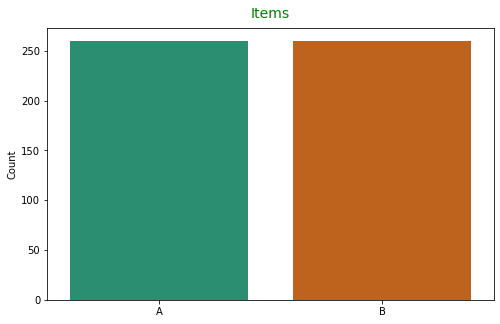

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = sns.countplot(x=data['ITEM'], palette='Dark2')

plt.title('Items', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel('')

In [14]:
df= data.copy()

In [15]:
# convert to date types
df= convert(df)

In [17]:
def date_features(df, label=None):
    df = df.copy()

    df['date'] = df.DATE
    df['month'] = df['date'].dt.strftime('%B')
    
    df['dayofweek'] = df['date'].dt.strftime('%A')
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['date','dayofweek','quarter','month',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X
X, y = date_features(df, label='SALES')
df_new = pd.concat([X, y], axis=1)
df_new.head()

,date,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,SALES
0,2019-02-01,Friday,1,February,32,1,5,113
1,2019-03-01,Friday,1,March,60,1,9,143
2,2019-04-01,Monday,2,April,91,1,14,145
3,2019-05-01,Wednesday,2,May,121,1,18,167
4,2019-06-01,Saturday,2,June,152,1,22,202


Text(0.5, 1.0, 'Store Sales Data in 2019')

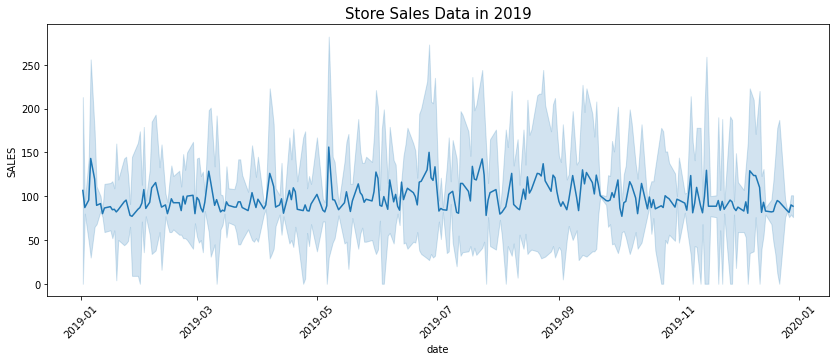

In [18]:
# lineplot for sales
fig, ax = plt.subplots(figsize=(14,5))

a=sns.lineplot(y='SALES',x='date',data=df_new)
plt.xticks(rotation=45)
a.set_title("Store Sales Data in 2019",fontsize=15)

Text(0.5, 1.0, 'Total Sales received By Quarter')

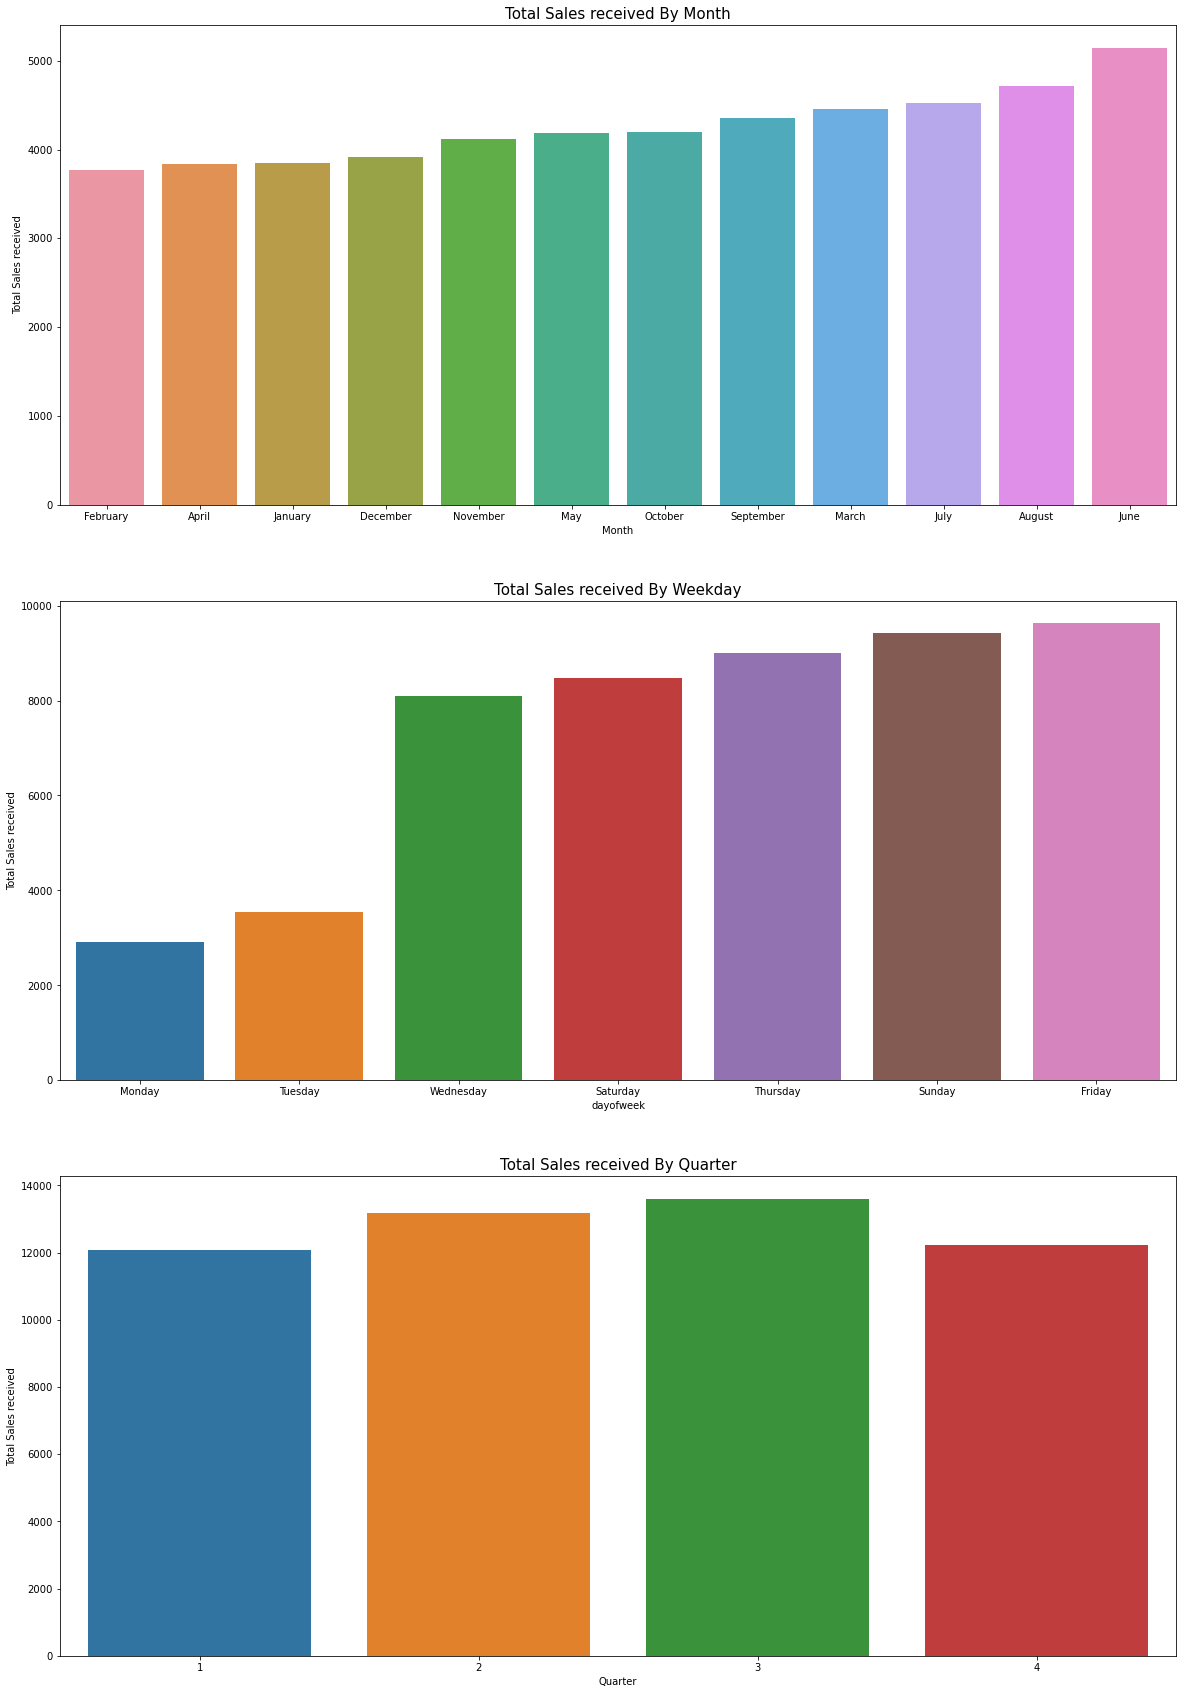

In [19]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(20,30)

monthAggregated = pd.DataFrame(df_new.groupby("month")["SALES"].sum()).reset_index().sort_values('SALES')
sns.barplot(data=monthAggregated,x="month",y="SALES",ax=ax1)
ax1.set(xlabel='Month', ylabel='Total Sales received')
ax1.set_title("Total Sales received By Month",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("dayofweek")["SALES"].sum()).reset_index().sort_values('SALES')
sns.barplot(data=monthAggregated,x="dayofweek",y="SALES",ax=ax2)
ax2.set(xlabel='dayofweek', ylabel='Total Sales received')
ax2.set_title("Total Sales received By Weekday",fontsize=15)

monthAggregated = pd.DataFrame(df_new.groupby("quarter")["SALES"].sum()).reset_index().sort_values('SALES')
sns.barplot(data=monthAggregated,x="quarter",y="SALES",ax=ax3)
ax3.set(xlabel='Quarter', ylabel='Total Sales received')
ax3.set_title("Total Sales received By Quarter",fontsize=15)



In [20]:
#Read dataset
LILLE = pd.read_csv('C:/Users/azade/Desktop/WCS/LILLE.csv', sep=',',  encoding='latin-1')
LYON = pd.read_csv('C:/Users/azade/Desktop/WCS/LYON.csv', sep=',',  encoding='latin-1')
MARSEILLE = pd.read_csv('C:/Users/azade/Desktop/WCS/MARSEILLE.csv', sep=',',  encoding='latin-1')
BORDOEAUX = pd.read_csv('C:/Users/azade/Desktop/WCS/BORDEAUX.csv', sep=',',  encoding='latin-1')


In [21]:
MARSEILLE.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2019-01-01,14,11,12,11,13,12,0.0,66,10.0,...,14,6,11,116,116,116,0,1,8.7,météo correcte
1,2019-01-02,12,10,46,9,12,10,0.0,53,10.0,...,12,3,6,113,116,116,0,1,8.7,météo défavorable
2,2019-01-03,12,7,11,7,10,11,0.0,54,10.0,...,12,2,5,116,116,116,0,1,8.7,météo défavorable
3,2019-01-04,10,7,12,7,9,9,0.0,49,10.0,...,10,0,5,116,122,119,0,1,3.4,météo défavorable
4,2019-01-05,10,6,24,5,8,9,0.0,57,10.0,...,10,1,2,116,116,113,0,1,8.7,météo défavorable


In [22]:
LILLE.shape

(365, 22)

In [23]:
MARSEILLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [24]:
# convert to date types
LILLE = convert(LILLE)
LYON = convert(LYON)
MARSEILLE = convert(MARSEILLE)
BORDOEAUX = convert(BORDOEAUX)

In [25]:
# make new columns
LILLE= date_feat(LILLE)
LYON= date_feat(LYON)
MARSEILLE= date_feat(MARSEILLE)
BORDOEAUX= date_feat(BORDOEAUX)

Text(0.5, 0, '')

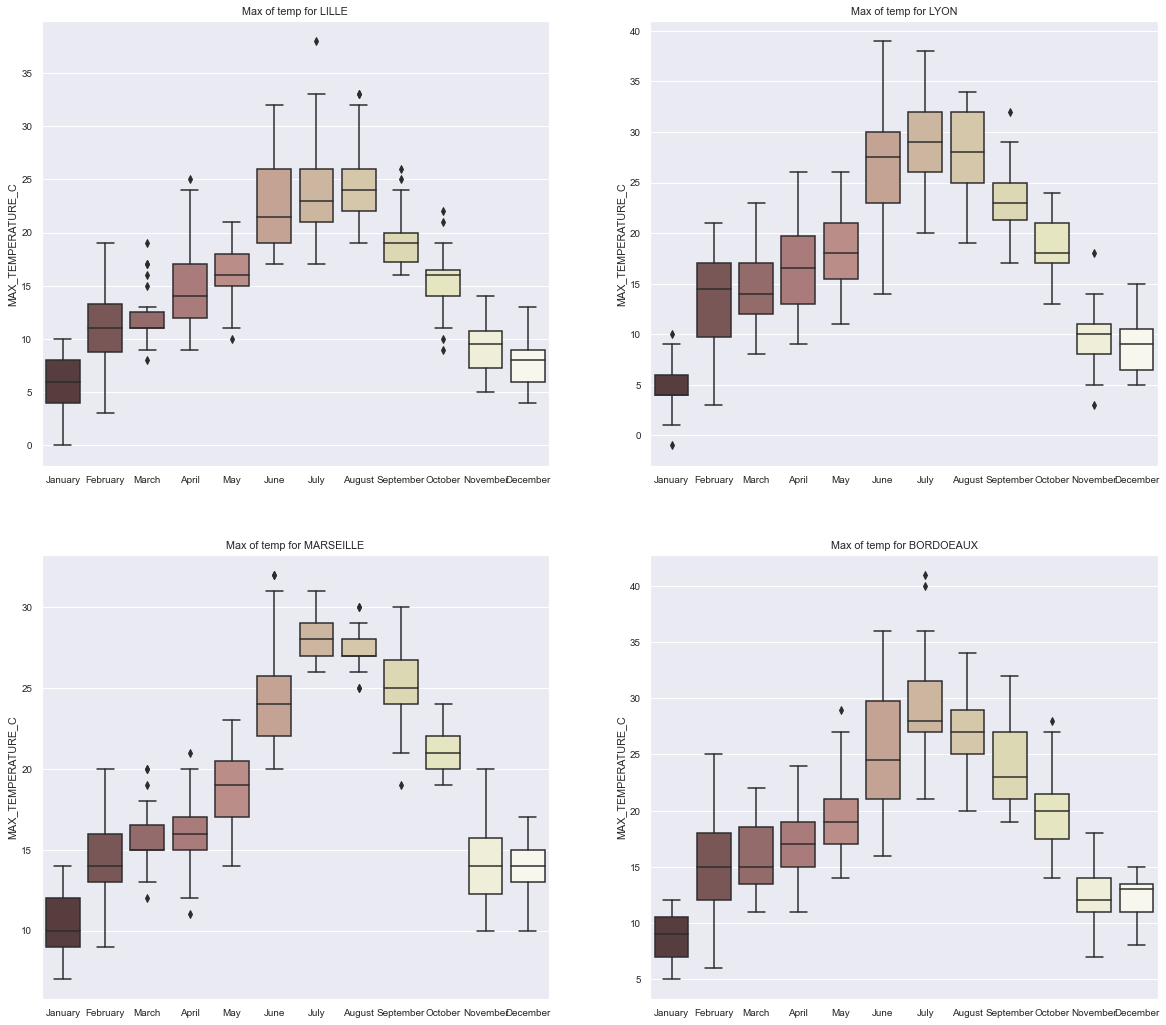

In [30]:
sns.set(font_scale=0.9)
plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
ax = sns.boxplot(data=LILLE, x='month', y='MAX_TEMPERATURE_C', palette='pink')
plt.title('Max of temp for LILLE')
plt.xlabel("")
plt.subplot(2,2,2)
sns.boxplot(data=LYON, x='month', y='MAX_TEMPERATURE_C', palette='pink')
plt.title('Max of temp for LYON')
plt.xlabel("")
plt.subplot(2,2,3)
sns.boxplot(data=MARSEILLE, x='month', y='MAX_TEMPERATURE_C', palette='pink')
plt.title('Max of temp for MARSEILLE')
plt.xlabel("")
plt.subplot(2,2,4)
sns.boxplot(data=BORDOEAUX, x='month', y='MAX_TEMPERATURE_C', palette='pink')
plt.title('Max of temp for BORDOEAUX')
plt.xlabel("")

Text(0.5, 0, '')

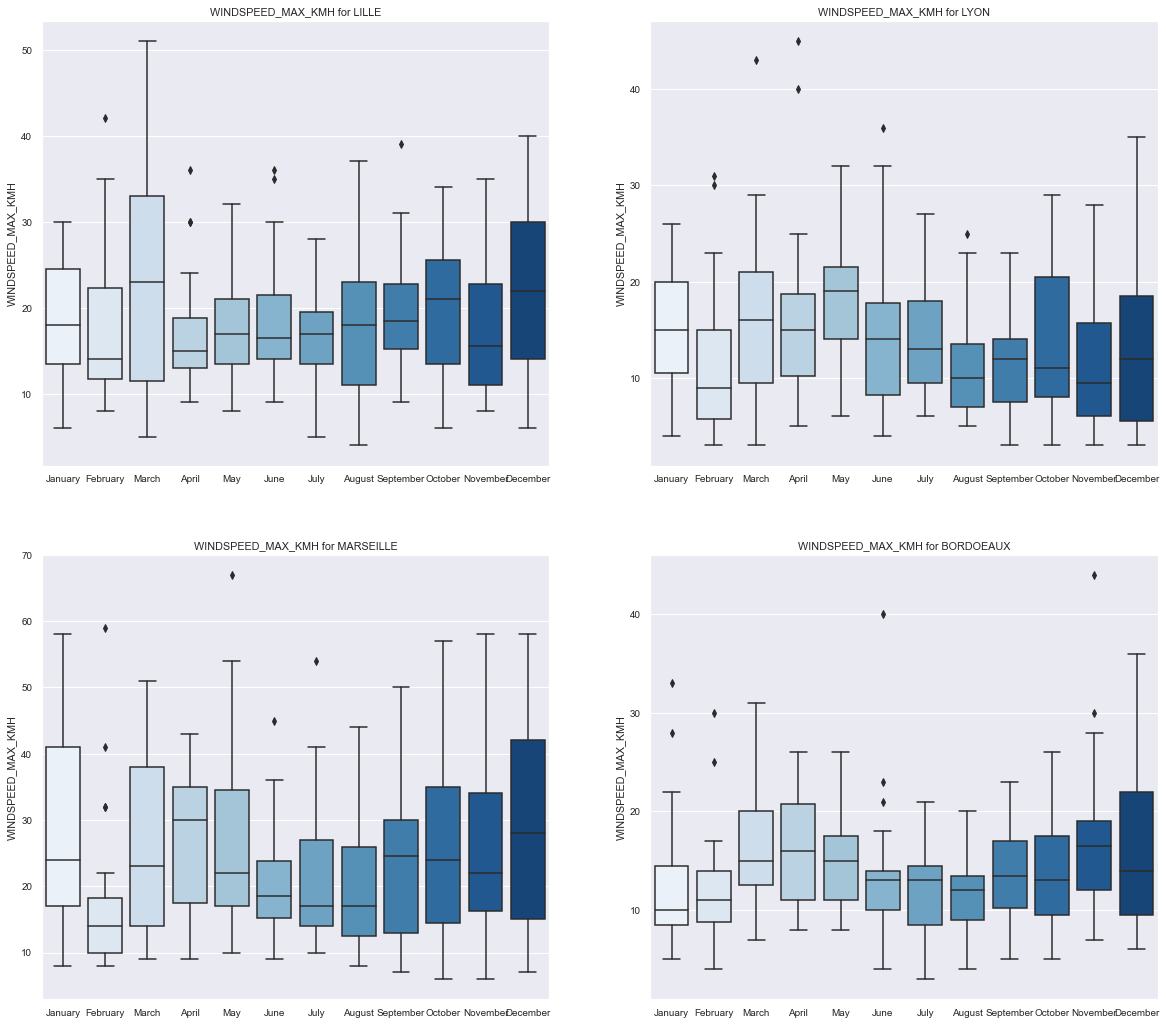

In [29]:
sns.set(font_scale=0.9)
plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
sns.boxplot(data=LILLE, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for LILLE')
plt.xlabel("")
plt.subplot(2,2,2)
sns.boxplot(data=LYON, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for LYON')
plt.xlabel("")
plt.subplot(2,2,3)
sns.boxplot(data=MARSEILLE, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for MARSEILLE')
plt.xlabel("")
plt.subplot(2,2,4)
sns.boxplot(data=BORDOEAUX, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for BORDOEAUX')
plt.xlabel("")

Text(0.5, 0, '')

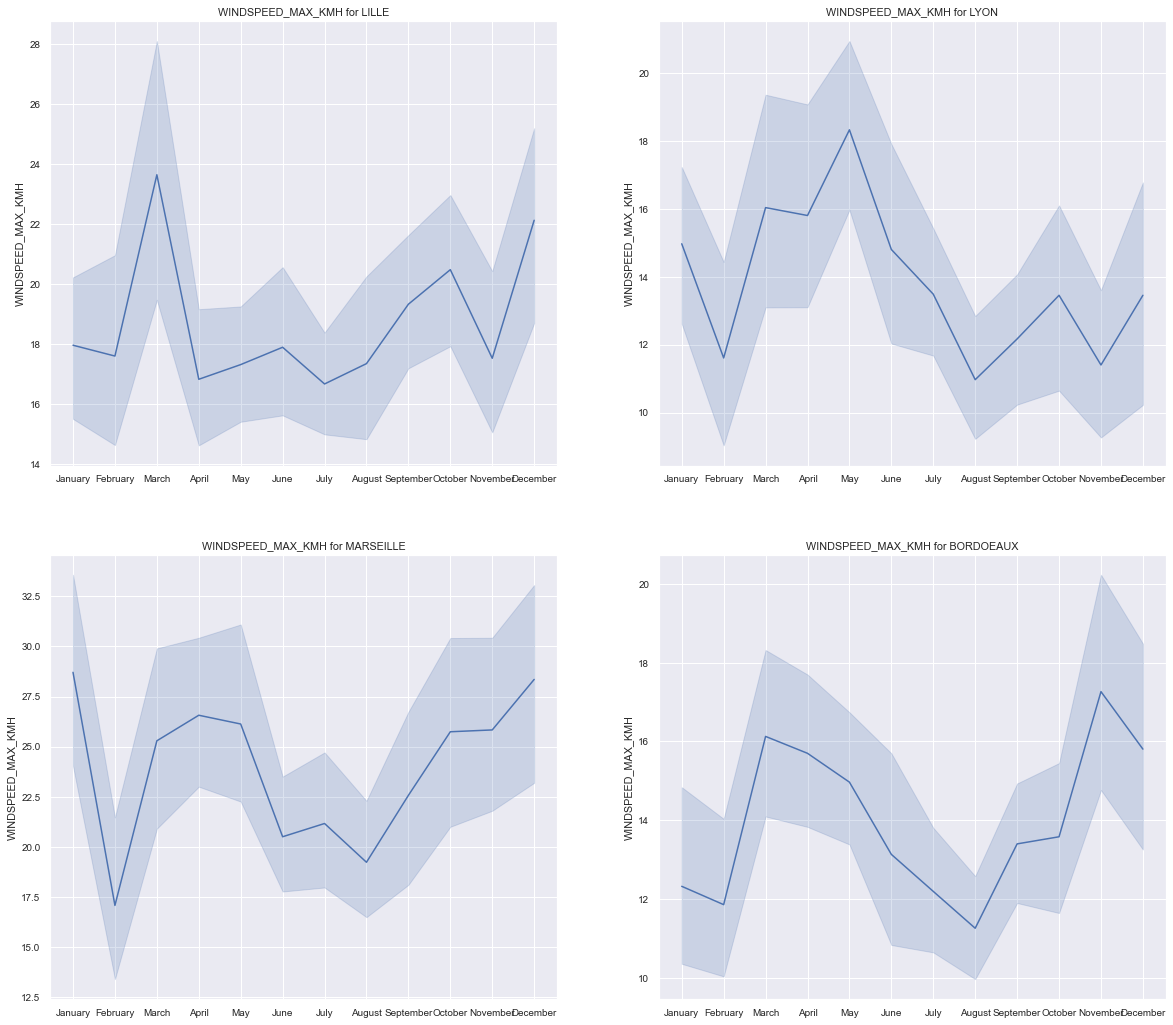

In [31]:
sns.set(font_scale=0.9)
plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
sns.lineplot(data=LILLE, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for LILLE')
plt.xlabel("")
plt.subplot(2,2,2)
sns.lineplot(data=LYON, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for LYON')
plt.xlabel("")
plt.subplot(2,2,3)
sns.lineplot(data=MARSEILLE, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for MARSEILLE')
plt.xlabel("")
plt.subplot(2,2,4)
sns.lineplot(data=BORDOEAUX, x='month', y='WINDSPEED_MAX_KMH', palette='Blues')
plt.title('WINDSPEED_MAX_KMH for BORDOEAUX')
plt.xlabel("")

Text(0.5, 0, '')

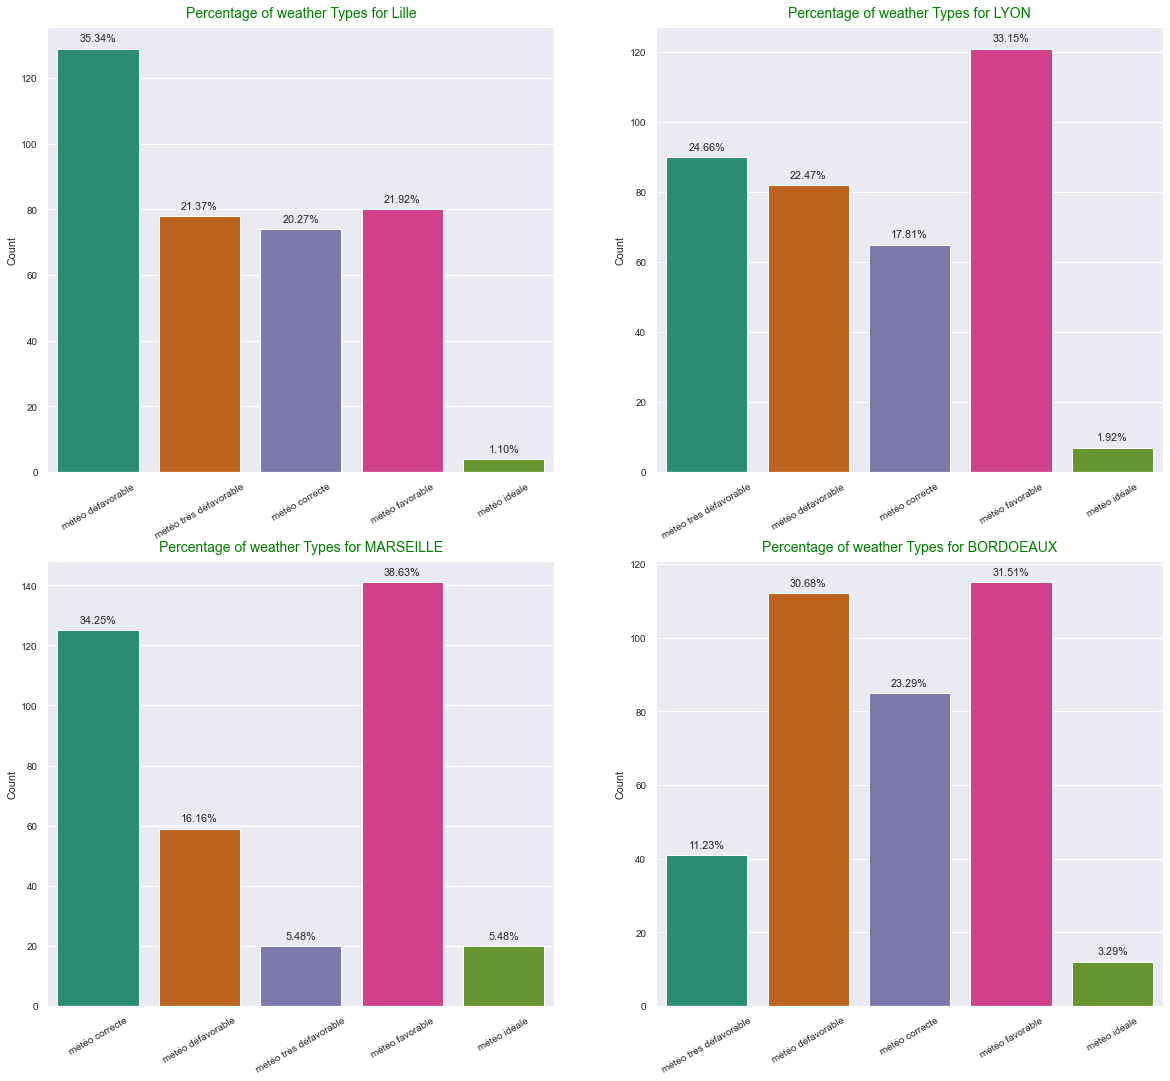

In [33]:
sns.set(font_scale=0.9)
plt.figure(figsize=(20,18))

plt.subplot(2,2,1)
ax = sns.countplot(x=LILLE['OPINION'], palette='Dark2')
total = len(LILLE['OPINION'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Percentage of weather Types for Lille', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel("")
plt.subplot(2,2,2)

ax = sns.countplot(x=LYON['OPINION'], palette='Dark2')
total = len(LYON['OPINION'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Percentage of weather Types for LYON', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel('')

plt.subplot(2,2,3)
ax = sns.countplot(x=MARSEILLE['OPINION'], palette='Dark2')
total = len(MARSEILLE['OPINION'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Percentage of weather Types for MARSEILLE', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel("")
plt.subplot(2,2,4)
ax = sns.countplot(x=BORDOEAUX['OPINION'], palette='Dark2')
total = len(BORDOEAUX['OPINION'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Percentage of weather Types for BORDOEAUX', size=14, color='green', pad=10)
plt.ylabel('Count')
plt.xlabel("")

In [32]:
# Merge sale dataset with MARSEILLE weather
df_merg = pd.merge(df, MARSEILLE, how="left",on="DATE")

In [13]:
df_merg.shape

(520, 29)

In [245]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    520 non-null    datetime64[ns]
 1   ITEM                    520 non-null    object        
 2   SALES                   520 non-null    int64         
 3   MAX_TEMPERATURE_C       520 non-null    int64         
 4   MIN_TEMPERATURE_C       520 non-null    int64         
 5   WINDSPEED_MAX_KMH       520 non-null    int64         
 6   TEMPERATURE_MORNING_C   520 non-null    int64         
 7   TEMPERATURE_NOON_C      520 non-null    int64         
 8   TEMPERATURE_EVENING_C   520 non-null    int64         
 9   PRECIP_TOTAL_DAY_MM     520 non-null    float64       
 10  HUMIDITY_MAX_PERCENT    520 non-null    int64         
 11  VISIBILITY_AVG_KM       520 non-null    float64       
 12  PRESSURE_MAX_MB         520 non-null    int64     

Text(0.5, 1.0, 'Corrolation for MARSEILLE')

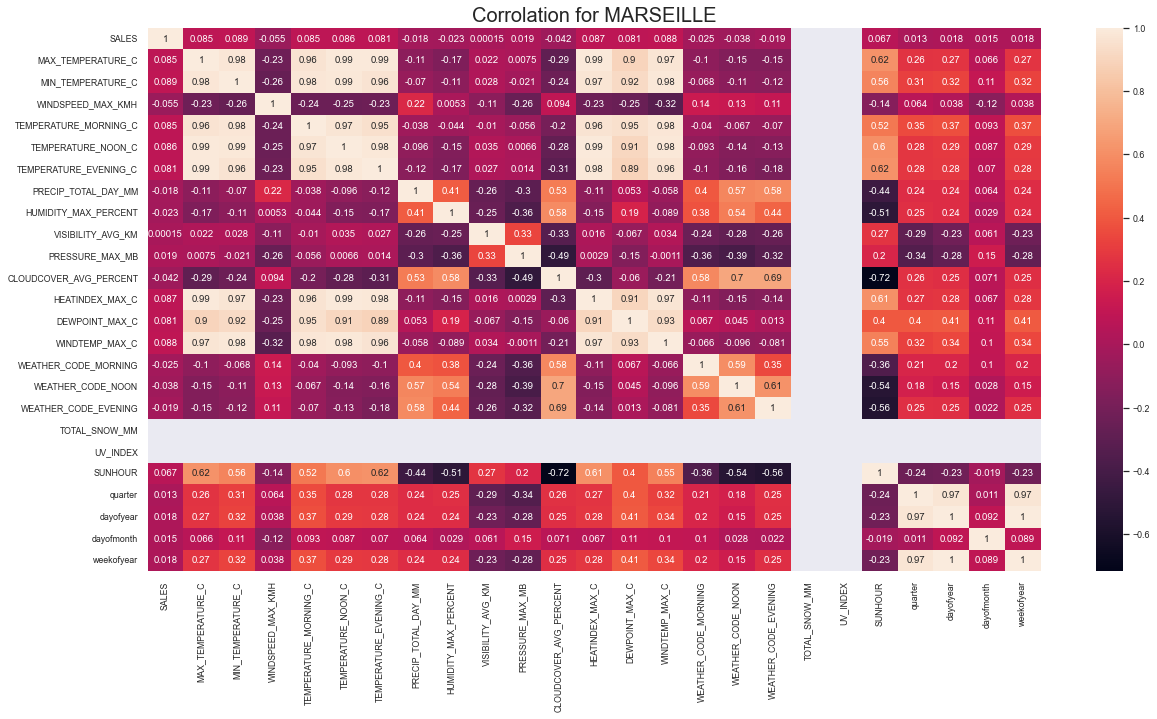

In [33]:
# Heatmap for MARSEILLE
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))

df_corr = df_merg.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

plt.title("Corrolation for MARSEILLE", fontsize =20)

In [247]:
df_merg.columns

Index(['DATE', 'ITEM', 'SALES', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C',
       'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C',
       'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT',
       'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT',
       'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C',
       'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION', 'month', 'dayofweek',
       'quarter', 'dayofyear', 'dayofmonth'],
      dtype='object')

In [34]:
# Drop high correllated variables
df_d= df_merg.drop(columns=['TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C',
                      'TEMPERATURE_EVENING_C','HEATINDEX_MAX_C',
                      'DEWPOINT_MAX_C','WINDTEMP_MAX_C'])

Text(0.5, 1.0, 'Corrolation for MARSEILLE')

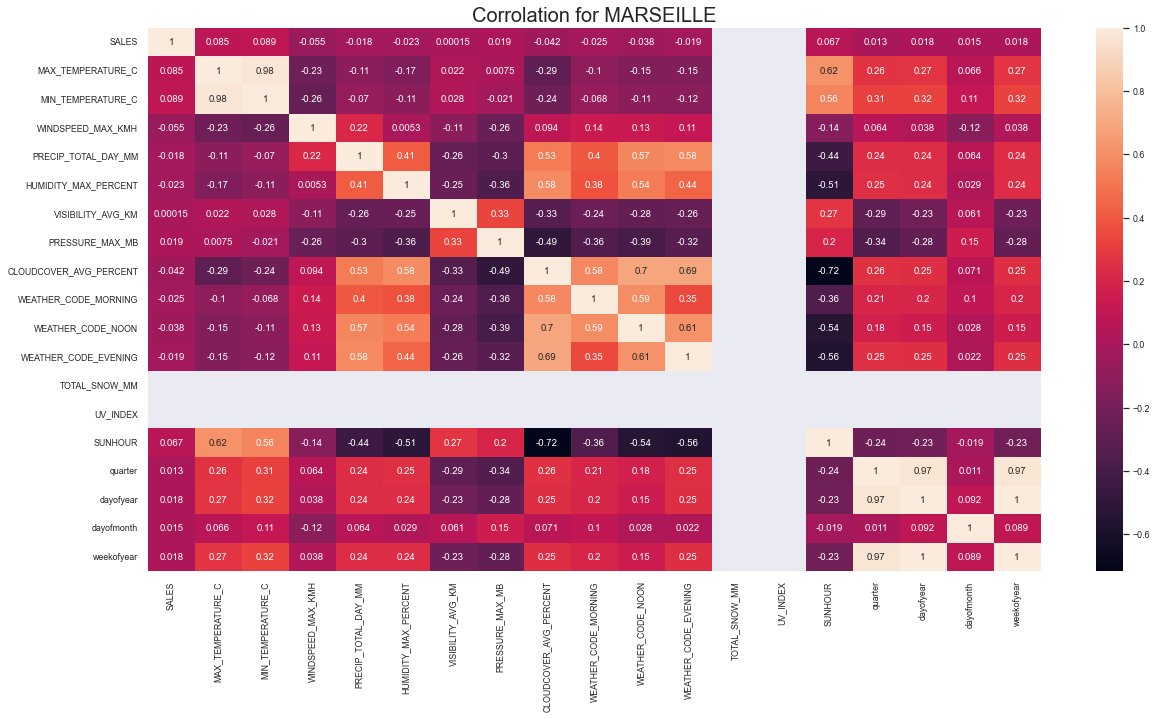

In [35]:
# Heat map for MARSEILLE
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))

df_corr = df_d.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);

plt.title("Corrolation for MARSEILLE", fontsize =20)

In [36]:
df_d.select_dtypes(include=['object']).columns.tolist()

['ITEM', 'OPINION', 'month', 'dayofweek']

In [37]:
df_d.select_dtypes(include=['int64']).columns.tolist()

['SALES',
 'MAX_TEMPERATURE_C',
 'MIN_TEMPERATURE_C',
 'WINDSPEED_MAX_KMH',
 'HUMIDITY_MAX_PERCENT',
 'PRESSURE_MAX_MB',
 'WEATHER_CODE_MORNING',
 'WEATHER_CODE_NOON',
 'WEATHER_CODE_EVENING',
 'TOTAL_SNOW_MM',
 'UV_INDEX',
 'quarter',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

In [38]:
df_d.select_dtypes(include=['float64']).columns.tolist()

['PRECIP_TOTAL_DAY_MM',
 'VISIBILITY_AVG_KM',
 'CLOUDCOVER_AVG_PERCENT',
 'SUNHOUR']

### ML

In [311]:

# split dataset into train test sets
X= df_d.drop(columns=['SALES','DATE'], axis=1)
y = df_d['SALES']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=34)


# traitement des variables discrete 
numeric_dis_features = [ 'MAX_TEMPERATURE_C',
                         'WINDSPEED_MAX_KMH',
                         'HUMIDITY_MAX_PERCENT',
                         'PRESSURE_MAX_MB',
                         'WEATHER_CODE_MORNING',
                         'WEATHER_CODE_NOON',
                         'WEATHER_CODE_EVENING',
                         'TOTAL_SNOW_MM',
                         'UV_INDEX',
                         'quarter',
                         'dayofyear',
                         'dayofmonth']
numeric_dis_transformer = Pipeline(steps=[('scaler', StandardScaler())])




# traitement des variables continues :  standardcaler
numeric_con_features = ['PRECIP_TOTAL_DAY_MM',
                         'VISIBILITY_AVG_KM',
                         'CLOUDCOVER_AVG_PERCENT',
                         'SUNHOUR']
numeric_con_transformer = Pipeline(steps=[ ('scaler', StandardScaler())])



categorical_features = ['ITEM', 'OPINION', 'month','dayofweek']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', numeric_dis_transformer, numeric_dis_features),
                                               ('num_cat', numeric_con_transformer, numeric_con_features),
                                               ('cat', categorical_transformer, categorical_features)])


from sklearn import set_config 
set_config(display='diagram')

preprocessor.fit(X_train, y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
                                  'HUMIDITY_MAX_PERCENT', 'PRESSURE_MAX_MB',
                                  'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON',
                                  'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
                                  'UV_INDEX', 'quarter', 'dayofyear',
                                  'dayofmonth']),
                                ('num_cat',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['PRECIP_TOTAL_DAY_MM', 'VISIBILITY_AVG_KM',
                                  'CLOUDCOVER_AVG_PERCENT', 'SUNHOUR']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ITEM', 'OPINION', 'month', 'dayofweek'])])

In [263]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(416, 20) (416,)
(104, 20) (104,)


#### RandomForestRegressor

In [331]:
# RandomForestRegressor
pipe_RFR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(RandomForestRegressor()))])

param_RFR = {
             'model__regressor__max_features' : ['sqrt', 'log2'],
             'model__regressor__n_estimators':[100,250],
             'model__regressor__max_depth':[5,10,15],
             'model__regressor__min_samples_split': [2, 5, 10],
             'model__regressor__bootstrap' : [True, False],
             'model__regressor__min_samples_leaf': [1,2,5],
             'model__regressor__n_jobs': [-1]}

grid_RFR = GridSearchCV( pipe_RFR, param_RFR,cv=4, verbose=5)
grid_RFR.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
[CV 1/4] END model__regressor__bootstrap=True, model__regressor__max_depth=5, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100, model__regressor__n_jobs=-1;, score=0.139 total time=  21.7s
[CV 2/4] END model__regressor__bootstrap=True, model__regressor__max_depth=5, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100, model__regressor__n_jobs=-1;, score=0.137 total time=   0.0s
[CV 3/4] END model__regressor__bootstrap=True, model__regressor__max_depth=5, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=1, model__regressor__min_samples_split=2, model__regressor__n_estimators=100, model__regressor__n_jobs=-1;, score=0.219 total time=   0.0s
[CV 4/4] END model__regressor__bootstrap=True, model__regressor__max_d

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MAX_TEMPERATURE_C',
                                                                          'WINDSPEED_MAX_KMH',
                                                                          'HUMIDITY_MAX_PERCENT',
                                                                          'PRESSURE_MAX_MB',
                                                                          'WEATHER_CODE_MORNING',
                                                                          'WEATHER_CODE_NOON',
                                                                          'WEATHER_CODE_EVENING',
                                                                          'TOTAL_SNOW_MM',
                                                                          'UV_INDEX',
                                                                          'quarter',
                                                                          'dayofyear',
                                                                          'dayofmo...
                                        TransformedTargetRegressor(regressor=RandomForestRegressor()))]),
             param_grid={'model__regressor__bootstrap': [True, False],
                         'model__regressor__max_depth': [5, 10, 15],
                         'model__regressor__max_features': ['sqrt', 'log2'],
                         'model__regressor__min_samples_leaf': [1, 2, 5],
                         'model__regressor__min_samples_split': [2, 5, 10],
                         'model__regressor__n_estimators': [100, 250],
                         'model__regressor__n_jobs': [-1]},
             verbose=5)

In [270]:
grid_RFR.best_params_

{'model__regressor__bootstrap': False,
 'model__regressor__max_depth': 15,
 'model__regressor__max_features': 'sqrt',
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__min_samples_split': 10,
 'model__regressor__n_estimators': 100,
 'model__regressor__n_jobs': -1}

In [276]:
# RandomForestRegressor best params
RFR = Pipeline(steps=[ ('preprocessor', preprocessor),
                             ('model',TransformedTargetRegressor(regressor= RandomForestRegressor(bootstrap= False,
                  max_depth= 15, max_features= 'sqrt', min_samples_leaf= 2,min_samples_split= 10,
                  n_estimators = 100, n_jobs= -1  )))])
RFR_fit = RFR.fit(X_train, y_train)
RFR_Score= RFR_fit.score(X_test, y_test)

In [277]:
RFR_Score

0.4234310778267725

In [281]:
print("score d'entrainement = ",RFR_Score,"\n")
y_pred = RFR_fit.predict(X_test)
MAE_RFR= mean_absolute_error(y_test,y_pred)
RMSE_RFR= mean_squared_error(y_test,y_pred , squared= False)
MSE_RFR = mean_squared_error(y_test,y_pred)

print("score de la prédiction:")#, accuracy_score(y_test, y_pred)), 
print("MAE = ",MAE_RFR)
print("RMSE = ",RMSE_RFR)
print("MSE = ",MSE_RFR)

score d'entrainement =  0.4234310778267725 

score de la prédiction:
MAE =  37.50158756984883
RMSE =  48.414812226238006
MSE =  2343.9940429018848


## GradientBoostingRegressor

In [343]:
# GradientBoostingRegressor
pipe_gbr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(GradientBoostingRegressor()))])
   
grid_gbr = {
             'model__regressor__n_estimators':np.linspace(800,1200,3).astype(int),
             'model__regressor__learning_rate':[0.1,0.13, 0.16],
             'model__regressor__max_depth':[4, 6, 8],
             'model__regressor__subsample':[0.9, 1, 1.2]}

gs_gbr = GridSearchCV(estimator=pipe_gbr,
                      param_grid=grid_gbr,
                      cv=4,
                      verbose=5)

gs_gbr.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4] END model__regressor__learning_rate=0.1, model__regressor__max_depth=4, model__regressor__n_estimators=800, model__regressor__subsample=0.9;, score=0.254 total time=   0.8s
[CV 2/4] END model__regressor__learning_rate=0.1, model__regressor__max_depth=4, model__regressor__n_estimators=800, model__regressor__subsample=0.9;, score=0.196 total time=   0.8s
[CV 3/4] END model__regressor__learning_rate=0.1, model__regressor__max_depth=4, model__regressor__n_estimators=800, model__regressor__subsample=0.9;, score=0.287 total time=   0.8s
[CV 4/4] END model__regressor__learning_rate=0.1, model__regressor__max_depth=4, model__regressor__n_estimators=800, model__regressor__subsample=0.9;, score=0.213 total time=   0.8s
[CV 1/4] END model__regressor__learning_rate=0.1, model__regressor__max_depth=4, model__regressor__n_estimators=800, model__regressor__subsample=1;, score=0.280 total time=   0.8s
[CV 2/4] END model__regressor_

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MAX_TEMPERATURE_C',
                                                                          'WINDSPEED_MAX_KMH',
                                                                          'HUMIDITY_MAX_PERCENT',
                                                                          'PRESSURE_MAX_MB',
                                                                          'WEATHER_CODE_MORNING',
                                                                          'WEATHER_CODE_NOON',
                                                                          'WEATHER_CODE_EVENING',
                                                                          'TOTAL_SNOW_MM',
                                                                          'UV_INDEX',
                                                                          'quarter',
                                                                          'dayofyear',
                                                                          'dayofmo...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ITEM',
                                                                          'OPINION',
                                                                          'month',
                                                                          'dayofweek'])])),
                                       ('model',
                                        TransformedTargetRegressor(regressor=GradientBoostingRegressor()))]),
             param_grid={'model__regressor__learning_rate': [0.1, 0.13, 0.16],
                         'model__regressor__max_depth': [4, 6],
                         'model__regressor__n_estimators': array([ 800, 1000, 1200]),
                         'model__regressor__subsample': [0.9, 1, 1.2]},
             verbose=5)

In [344]:
gs_gbr.best_params_

{'model__regressor__learning_rate': 0.13,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 1000,
 'model__regressor__subsample': 1}

In [476]:
# GradientBoostingRegressor best params
GBR= Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.13,
                                      max_depth=6, subsample=1))])

GBR_fit= GBR.fit(X_train, y_train)
GBR_Score= GBR.score(X_test, y_test)

In [346]:
print("score d'entrainement = ",GBR_Score,"\n")
y_pred = GBR.predict(X_test)
MAE_gbr= mean_absolute_error(y_test,y_pred)
RMSE_gbr = np.sqrt(mean_squared_error(y_test,y_pred))
MSE_gbr = mean_squared_error(y_test,y_pred)

print("score de la prédiction:")#, accuracy_score(y_test, y_pred)), 
print("MAE = ",MAE_gbr)
print("RMSE = ",RMSE_gbr)
print("MSE = ",MSE_gbr)

score d'entrainement =  0.6851275881835939 

score de la prédiction:
MAE =  23.940505950067422
RMSE =  35.778319858848455
MSE =  1280.0881719220697


### Seprate Vector Regression

In [385]:
from sklearn.svm import SVR
# Seprate Vector Regression
pipe_SVR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(SVR())) ])
   
param_SVR = { 'model__regressor__C' : range(200,400,10),
              'model__regressor__epsilon' : [35, 40, 45],
              'model__regressor__kernel':['poly','rbf'],
              'model__regressor__gamma' : ['auto', 'scale'],
              'model__regressor__degree' : [1e-63, 1e-53,1e-43 ]
                }

GS_SVR = GridSearchCV(pipe_SVR,  param_SVR, cv=4,verbose=5)
                      
GS_SVR.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
[CV 1/4] END model__regressor__C=200, model__regressor__degree=1e-63, model__regressor__epsilon=35, model__regressor__gamma=auto, model__regressor__kernel=poly;, score=-0.003 total time=   0.0s
[CV 2/4] END model__regressor__C=200, model__regressor__degree=1e-63, model__regressor__epsilon=35, model__regressor__gamma=auto, model__regressor__kernel=poly;, score=-0.108 total time=   0.0s
[CV 3/4] END model__regressor__C=200, model__regressor__degree=1e-63, model__regressor__epsilon=35, model__regressor__gamma=auto, model__regressor__kernel=poly;, score=-0.018 total time=   0.0s
[CV 4/4] END model__regressor__C=200, model__regressor__degree=1e-63, model__regressor__epsilon=35, model__regressor__gamma=auto, model__regressor__kernel=poly;, score=-0.000 total time=   0.0s
[CV 1/4] END model__regressor__C=200, model__regressor__degree=1e-63, model__regressor__epsilon=35, model__regressor__gamma=auto, model__regressor__kernel=rbf;,

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MAX_TEMPERATURE_C',
                                                                          'WINDSPEED_MAX_KMH',
                                                                          'HUMIDITY_MAX_PERCENT',
                                                                          'PRESSURE_MAX_MB',
                                                                          'WEATHER_CODE_MORNING',
                                                                          'WEATHER_CODE_NOON',
                                                                          'WEATHER_CODE_EVENING',
                                                                          'TOTAL_SNOW_MM',
                                                                          'UV_INDEX',
                                                                          'quarter',
                                                                          'dayofyear',
                                                                          'dayofmo...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ITEM',
                                                                          'OPINION',
                                                                          'month',
                                                                          'dayofweek'])])),
                                       ('model',
                                        TransformedTargetRegressor(regressor=SVR()))]),
             param_grid={'model__regressor__C': range(200, 400, 10),
                         'model__regressor__degree': [1e-63, 1e-53, 1e-43],
                         'model__regressor__epsilon': [35, 40, 45],
                         'model__regressor__gamma': ['auto', 'scale'],
                         'model__regressor__kernel': ['poly', 'rbf']},
             verbose=5)

In [386]:
GS_SVR.best_params_

{'model__regressor__C': 200,
 'model__regressor__degree': 1e-63,
 'model__regressor__epsilon': 45,
 'model__regressor__gamma': 'auto',
 'model__regressor__kernel': 'rbf'}

In [355]:
GS_SVR.best_score_

0.050772869119832004

In [387]:
# SVR best params
SVR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(SVR(C=200, degree=1e-63, epsilon=45, gamma= 'auto',
                                                                   kernel= 'rbf'))) ])
   
SVR_fit = SVR.fit(X_train, y_train)
SVR_Score = SVR.score(X_test, y_test)
SVR_Score

0.11113255491061891

In [403]:
print("score d'entrainement = ",SVR_Score,"\n")
y_pred = SVR.predict(X_test)
MAE_SVR= mean_absolute_error(y_test,y_pred)
RMSE_SVR = mean_squared_error(y_test,y_pred, squared= False)
MSE_SVR = mean_squared_error(y_test,y_pred)

print("score de la prédiction:")#, accuracy_score(y_test, y_pred)), 
print("MAE = ",MAE_SVR)
print("RMSE = ",RMSE_SVR)
print("MSE = ",MSE_SVR)

score d'entrainement =  0.11113255491061891 

score de la prédiction:
MAE =  46.92127850437656
RMSE =  60.11337853518146
MSE =  3613.6182789140153


In [395]:
# ExtraTreesRegressor
pipe_ETR = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', TransformedTargetRegressor(ExtraTreesRegressor())) ])
   
grid_ETR = [{
            'model__regressor__n_estimators' :range(1,100,10),
            'model__regressor__min_samples_split': [3, 4,5, 6],
            'model__regressor__min_samples_leaf': [ 3, 4, 5 6],
            'model__regressor__max_features': ['sqrt', 'log2'],
            'model__regressor__bootstrap': [False, True],
            'model__regressor__n_jobs': [None, -1]
                        }]

GS_ETR = GridSearchCV(pipe_ETR, grid_ETR, cv=4, verbose=5)

GS_ETR.fit(X_train, y_train)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
[CV 1/4] END model__regressor__bootstrap=False, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=3, model__regressor__min_samples_split=3, model__regressor__n_estimators=1, model__regressor__n_jobs=None;, score=0.002 total time=   0.0s
[CV 2/4] END model__regressor__bootstrap=False, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=3, model__regressor__min_samples_split=3, model__regressor__n_estimators=1, model__regressor__n_jobs=None;, score=-0.200 total time=   0.0s
[CV 3/4] END model__regressor__bootstrap=False, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=3, model__regressor__min_samples_split=3, model__regressor__n_estimators=1, model__regressor__n_jobs=None;, score=0.119 total time=   0.0s
[CV 4/4] END model__regressor__bootstrap=False, model__regressor__max_features=sqrt, model__regressor__min_samples_leaf=3, model__regressor__min_samples_split

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MAX_TEMPERATURE_C',
                                                                          'WINDSPEED_MAX_KMH',
                                                                          'HUMIDITY_MAX_PERCENT',
                                                                          'PRESSURE_MAX_MB',
                                                                          'WEATHER_CODE_MORNING',
                                                                          'WEATHER_CODE_NOON',
                                                                          'WEATHER_CODE_EVENING',
                                                                          'TOTAL_SNOW_MM',
                                                                          'UV_INDEX',
                                                                          'quarter',
                                                                          'dayofyear',
                                                                          'dayofmo...
                                        TransformedTargetRegressor(regressor=ExtraTreesRegressor()))]),
             param_grid=[{'model__regressor__bootstrap': [False, True],
                          'model__regressor__max_features': ['sqrt', 'log2'],
                          'model__regressor__min_samples_leaf': [3, 4, 5],
                          'model__regressor__min_samples_split': [3, 4, 5],
                          'model__regressor__n_estimators': range(1, 100, 10),
                          'model__regressor__n_jobs': [None, -1]}],
             verbose=5)

In [396]:
GS_ETR.best_params_

{'model__regressor__bootstrap': False,
 'model__regressor__max_features': 'sqrt',
 'model__regressor__min_samples_leaf': 5,
 'model__regressor__min_samples_split': 5,
 'model__regressor__n_estimators': 11,
 'model__regressor__n_jobs': None}

In [398]:
#ExtraTreesRegressor best params
ETR= Pipeline(steps=[('preprocessor', preprocessor),
                              ('model',ExtraTreesRegressor(n_estimators= 11 ,min_samples_leaf= 5,
                                min_samples_split= 5, bootstrap= False , max_features = 'sqrt', n_jobs= None))])
ETR_fit= ETR.fit(X_train, y_train)
ETR_score= ETR.score(X_test, y_test)
ETR_score

0.34050832517192253

In [402]:
print("score d'entrainement = ",ETR_score,"\n")
y_pred = ETR.predict(X_test)
MAE_ETR= mean_absolute_error(y_test,y_pred)
RMSE_ETR = np.sqrt(mean_squared_error(y_test,y_pred))
MSE_ETR = mean_squared_error(y_test,y_pred)

print("score de la prédiction:")
print("MAE = ",MAE_ETR)
print("RMSE = ",RMSE_ETR)
print("MSE = ",MSE_ETR)

score d'entrainement =  0.34050832517192253 

score de la prédiction:
MAE =  39.703493430190896
RMSE =  51.77943363099401
MSE =  2681.109747146514


In [404]:
model_df = {'models': ['Gradient Boosting', 'RandomForestRegressor', 'SVR', 'ExtraTreesRegressor'],
            'mean_absolute_error': [MAE_gbr, MAE_RFR, MAE_SVR,MAE_ETR ],
            'Root_mean_squared_error': [RMSE_gbr, RMSE_RFR, RMSE_SVR, RMSE_ETR],
            
            'Score': [GBR_Score,RFR_Score, SVR_Score, ETR_score]}
result= pd.DataFrame(model_df)
result

,models,mean_absolute_error,Root_mean_squared_error,Score
0,Gradient Boosting,23.940506,35.778320,0.685128
1,RandomForestRegressor,37.501588,48.414812,0.423431
2,SVR,46.921279,60.113379,0.111133
3,ExtraTreesRegressor,39.703493,51.779434,0.340508


Text(0.5, 1.0, ' variance error')

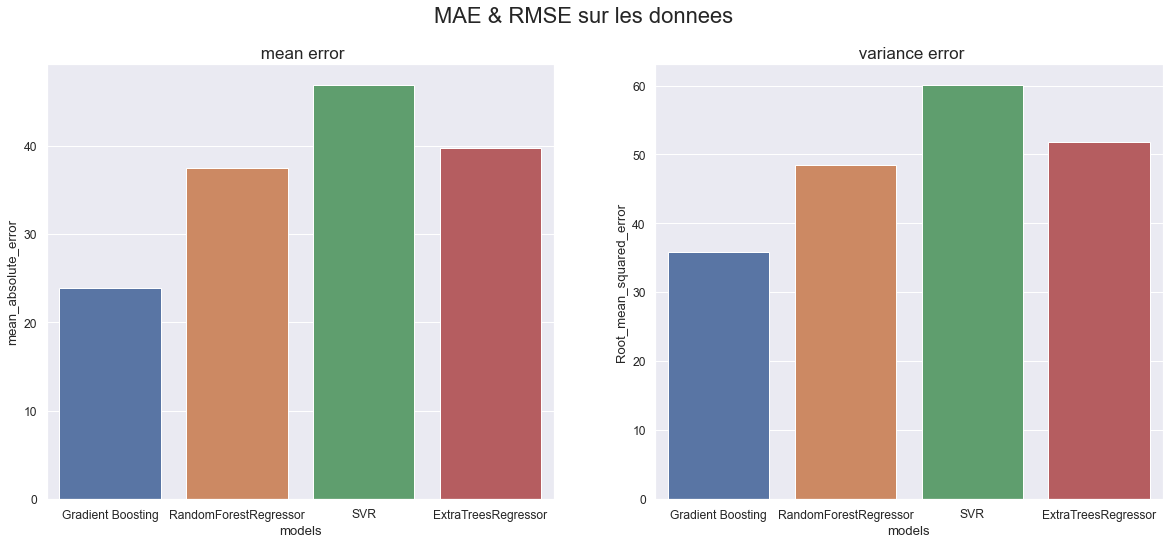

In [405]:
sns.set(font_scale=1.1)
plt.figure(figsize=(20,8))
plt.suptitle("MAE & RMSE sur les donnees ",fontsize=22)
plt.subplot(1,2,1)
sns.barplot(x= result['models'] ,y=result['mean_absolute_error'])
plt.title(" mean error", fontsize=17)

plt.subplot(1,2,2)
sns.barplot(x= result['models'] ,y=result['Root_mean_squared_error'])
plt.title(" variance error", fontsize=17)

In [406]:
feature_importances= GBR.named_steps['model'].feature_importances_
feature_importances

array([1.81690887e-01, 1.14544368e-02, 3.10943391e-02, 1.29579868e-02,
       4.75398871e-03, 3.90011241e-02, 5.65709517e-03, 0.00000000e+00,
       1.03852979e-02, 1.02231359e-03, 2.47595450e-02, 3.02191042e-01,
       2.12414828e-01, 7.45749904e-03, 3.40495587e-02, 9.78395138e-03,
       2.91811347e-02, 2.42179749e-02, 2.08282599e-03, 4.56654233e-04,
       1.16296299e-02, 2.89614997e-03, 2.65179096e-03, 1.35160831e-04,
       1.40552437e-04, 6.94646834e-03, 5.57771712e-04, 1.12133301e-03,
       2.29715400e-03, 1.86290880e-03, 2.43757847e-04, 4.22750236e-04,
       1.24385562e-04, 6.15638490e-04, 2.56726515e-04, 2.00480987e-03,
       8.22611861e-03, 2.02573926e-04, 2.03767970e-03, 8.47549919e-04,
       9.76406466e-03, 4.02542703e-04])

In [407]:
ohe_feature_nemes= GBR['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)


In [408]:
ohe_feature_nemes

array(['ITEM_A', 'ITEM_B', 'OPINION_météo correcte',
       'OPINION_météo défavorable', 'OPINION_météo favorable',
       'OPINION_météo idéale', 'OPINION_météo très défavorable',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March',
       'month_May', 'month_November', 'month_October', 'month_September',
       'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday'], dtype=object)

In [409]:
numeric_features_names= np.concatenate([numeric_dis_features,numeric_con_features])
numeric_features_names

array(['MAX_TEMPERATURE_C', 'WINDSPEED_MAX_KMH', 'HUMIDITY_MAX_PERCENT',
       'PRESSURE_MAX_MB', 'WEATHER_CODE_MORNING', 'WEATHER_CODE_NOON',
       'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'quarter',
       'dayofyear', 'dayofmonth', 'PRECIP_TOTAL_DAY_MM',
       'VISIBILITY_AVG_KM', 'CLOUDCOVER_AVG_PERCENT', 'SUNHOUR'],
      dtype='<U22')

In [413]:
feature_importances_names= np.concatenate([numeric_features_names,ohe_feature_nemes,])
feature_importances_names.shape

(42,)

In [414]:
#zip coeff & names together and make  DataFrame
zipped= zip(feature_importances_names,feature_importances)
fi_df= pd.DataFrame(zipped, columns=['feature','importances'])
fi_df

,feature,importances
0,MAX_TEMPERATURE_C,0.181691
1,WINDSPEED_MAX_KMH,0.011454
2,HUMIDITY_MAX_PERCENT,0.031094
3,PRESSURE_MAX_MB,0.012958
4,WEATHER_CODE_MORNING,0.004754
5,WEATHER_CODE_NOON,0.039001
6,WEATHER_CODE_EVENING,0.005657
7,TOTAL_SNOW_MM,0.000000
8,UV_INDEX,0.010385
9,quarter,0.001022


<AxesSubplot:xlabel='importances', ylabel='feature'>

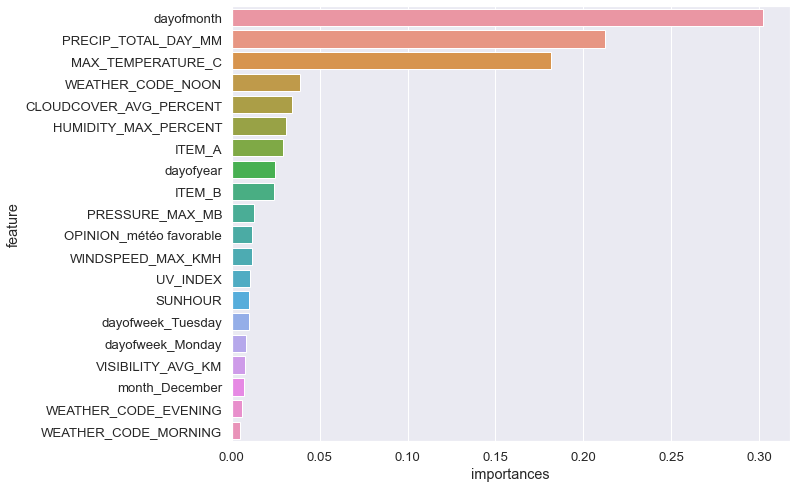

In [416]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.barplot(y='feature', x='importances', data= fi_df.sort_values(by= 'importances', ascending = False).head(20))

In [16]:
pr = pd.read_csv('C:/Users/azade/Desktop/WCS/forcast.csv')
pr.head(10)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT
0,2021-06-21,20,14,23,2.0,92,7.0,1025,61.0
1,2021-06-22,25,17,10,0.0,73,9.0,1027,26.0
2,2021-06-23,25,18,19,0.0,79,10.0,1024,19.0
3,2021-06-24,32,23,12,0.0,76,10.0,1018,2.0
4,2021-06-25,28,20,13,1.0,82,10.0,1015,36.0
5,2021-06-26,20,16,19,0.0,88,9.0,1013,89.0
6,2021-06-27,21,15,31,1.0,89,9.0,1015,76.0


In [531]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    7 non-null      object 
 1   MAX_TEMPERATURE_C       7 non-null      int64  
 2   MIN_TEMPERATURE_C       7 non-null      int64  
 3   WINDSPEED_MAX_KMH       7 non-null      int64  
 4   PRECIP_TOTAL_DAY_MM     7 non-null      float64
 5   HUMIDITY_MAX_PERCENT    7 non-null      int64  
 6   VISIBILITY_AVG_KM       7 non-null      float64
 7   PRESSURE_MAX_MB         7 non-null      int64  
 8   CLOUDCOVER_AVG_PERCENT  7 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 632.0+ bytes


In [26]:
X_f= df_fin.drop(columns=['SALES'], axis=1)
y_f = df_fin['SALES']

X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f,y_f, test_size=0.2, random_state=34)

In [36]:
scale= StandardScaler()
X_tr_std= scale.fit_transform(X_f_train)
X_ts_std= scale.fit_transform(X_f_test)

In [97]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_f_train, y_f_train):
    param_tuning = {
                    'learning_rate': [0.01, 0.1],
                    'max_depth': [3, 5, 7, 10],
                    'subsample': [0.5, 0.7],
                    'n_estimators' : [100, 200, 500],
                    
    }

    xgb_model = GradientBoostingRegressor() 

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                         
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    gsearch.fit(X_f_train,y_f_train)

    return gsearch.best_params_

In [98]:
hyperParameterTuning(X_f_train, y_f_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [99]:
# GradientBoostingRegressor best params
GBR= GradientBoostingRegressor(n_estimators=100, learning_rate=0.01,
                                      max_depth=3, subsample=0.5)

GBR_fit_f= GBR.fit(X_tr_std, y_f_train)
GBR_score_m= GBR.score(X_ts_std, y_f_test)

In [100]:
print("score d'entrainement = ",GBR_score_m,"\n")
y_pred = GBR.predict(X_ts_std)
MAE_GBR_f= mean_absolute_error(y_f_test,y_pred)
RMSE_GBR_f = np.sqrt(mean_squared_error(y_f_test,y_pred))


print("score de la prédiction:")
print("MAE = ",MAE_GBR_f)
print("RMSE = ",RMSE_GBR_f)

score d'entrainement =  -0.0460604458727818 

score de la prédiction:
MAE =  55.71049822143623
RMSE =  65.2125266664892
